<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Canny -> Github
[![download](https://img.shields.io/static/v1?label=Naas&labelColor=000000&message=Download&color=success&style=for-the-badge&logo=image%2Fsvg%2Bxml%3Bbase64%2CPD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiPz4KPHN2ZyB3aWR0aD0iMTAyNHB4IiBoZWlnaHQ9IjEwMjRweCIgdmlld0JveD0iMCAwIDEwMjQgMTAyNCIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIiB4bWxuczp4bGluaz0iaHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayIgdmVyc2lvbj0iMS4xIj4KIDwhLS0gR2VuZXJhdGVkIGJ5IFBpeGVsbWF0b3IgUHJvIDIuMC41IC0tPgogPGRlZnM%2BCiAgPHRleHQgaWQ9InN0cmluZyIgdHJhbnNmb3JtPSJtYXRyaXgoMS4wIDAuMCAwLjAgMS4wIDIyOC4wIDU0LjUpIiBmb250LWZhbWlseT0iQ29tZm9ydGFhLVJlZ3VsYXIsIENvbWZvcnRhYSIgZm9udC1zaXplPSI4MDAiIHRleHQtZGVjb3JhdGlvbj0ibm9uZSIgZmlsbD0iI2ZmZmZmZiIgeD0iMS4xOTk5OTk5OTk5OTk5ODg2IiB5PSI3MDUuMCI%2BbjwvdGV4dD4KIDwvZGVmcz4KIDx1c2UgaWQ9Im4iIHhsaW5rOmhyZWY9IiNzdHJpbmciLz4KPC9zdmc%2BCg%3D%3D)](https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Canny/Canny_Github_issue_update.ipynb)

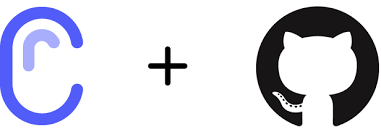

In [1]:
#pip install PyGithub

## Pre-requisite - Import packages

In [2]:
import requests
import json
from github import Github

## Step 1 - Insert your accounts details

In [3]:
# For Github 
gihub_personal_token = "**********"                               # Settings/Developer settings/Personal access tokens
github_repo = "optimusprime2021/api-tester"                       # Github repository name

# For Canny
canny_post_url = "https://canny.io/api/v1/posts/list"             # Canny post url
canny_apikey = "**********"                                       # Canny api key

#### Input api-keys 

## Step 2 - Get Canny posts Dataframe

### Retrieve posts

In [4]:
response = requests.get(canny_post_url)
data = {"apiKey":canny_apikey,"id":"","limit":"100"}
response = requests.post(canny_post_url,data)
post_details = response.json()

## Step 3 - Check connection status

In [5]:
if response.status_code == 200:
    print("Successfully connected to Canny")
elif response.status_code == 404:
    print("Couldn't connect to Canny, Please check the credentials")
    exit()

Successfully connected to Canny


## Step 4 - Generating dataframe

In [6]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
dd = post_details['posts']
df = pd.DataFrame(columns = dd[0].keys()) 
for i in range(len(dd)):
    df = df.append(dd[i], ignore_index=True)
# df

board = []
category = []
tags = []
for i in range(len(df)):
    board.append(df['board'][i]['name'])
    if not df['category'][i]:
        category.append('Not assigned')
    else:
        category.append(df['category'][i]['name'])    
    if not df['tags'][i]:
        tags.append('Not assigned')
    else:
        tags.append(df['tags'][i][0]['name'])
        
        
df = df[['title','status','details','url']]
df['board'] = board
df['category'] = category
df['tags'] = tags
df = df[(df["tags"] == "Awesome-notebooks")]          # tag name
df

title        status  \
8                               PDF to MP3   in progress   
9                     Convert docx to html   in progress   
52      Healthkit - Parse and extract data  under review   
58  World Data - Expose wordwide COVID Map   in progress   
59                 NewsAPI - Get news data       planned   
66                 Odoo - Connect with API  under review   
67                     Slack - Create user  under review   
74   IFTTT - Trigger workflow from webhook   in progress   
77              Stripe - Get payments list       planned   
78            Pipedrive - Get contact list       planned   
80           Salesforce - Get contact list       planned   

                                              details  \
8   I'm able to convert one text PDF (eBook) to a ...   
9                      I can convert one docx to html   
52  Parse and extract data (ex: https://www.ivaylo...   
58  Filter buttons: Confirmed, Active cases, Death...   
59                                  with naas_drivers   
66    Info : https://pypi.org/project/odoo-connector/   
67  Input : \n- Slack API key\n- Email \n- Full Na...   
74                              Based on Naas drivers   
77  Input : \nStripe API Key\nOutput: \nDataframe ...   
78  Input : \nPipedrive API Key\nOutput : \nDatafr...   
80  Input : \nSalesforce API Key\nOutput : \nDataf...   

                                                  url     board      category  \
8   https://naas.canny.io/admin/board/requests/p/p...  Requests  File_parsing   
9   https://naas.canny.io/admin/board/requests/p/c...  Requests  File_parsing   
52  https://naas.canny.io/admin/board/requests/p/h...  Requests        Health   
58  https://naas.canny.io/admin/board/requests/p/w...  Requests    World Data   
59  https://naas.canny.io/admin/board/requests/p/n...  Requests          News   
66  https://naas.canny.io/admin/board/requests/p/o...  Requests           ERP   
67  https://naas.canny.io/admin/board/requests/p/s...  Requests     Messaging   
74  https://naas.canny.io/admin/board/requests/p/i...  Requests    Automation   
77  https://naas.canny.io/admin/board/requests/p/s...  Requests           CRM   
78  https://naas.canny.io/admin/board/requests/p/p...  Requests           CRM   
80  https://naas.canny.io/admin/board/requests/p/s...  Requests           CRM   

                 tags  
8   Awesome-notebooks  
9   Awesome-notebooks  
52  Awesome-notebooks  
58  Awesome-notebooks  
59  Awesome-notebooks  
66  Awesome-notebooks  
67  Awesome-notebooks  
74  Awesome-notebooks  
77  Awesome-notebooks  
78  Awesome-notebooks  
80  Awesome-notebooks

In [7]:
## add url to dataframe

## Step 6 - Existing issue list

In [8]:
issues = []
g = Github(gihub_personal_token)
repo = g.get_repo(github_repo)
open_issues = repo.get_issues(state='open')
for issue in open_issues:
    issues.append(issue.title)

## Step 7 - Push all issues

In [9]:
repo = g.get_repo(github_repo)
for i in df.index:
    if df['title'][i] not in issues:
        repo.create_issue(title=df['title'][i], body=df['details'][i]+"\n canny url: "+df['url'][i])

## Close all issues

In [10]:
# repo = g.get_repo(github_repo)
# open_issues = repo.get_issues(state='open')
# for issue in open_issues:
#     issue.edit(state='closed')